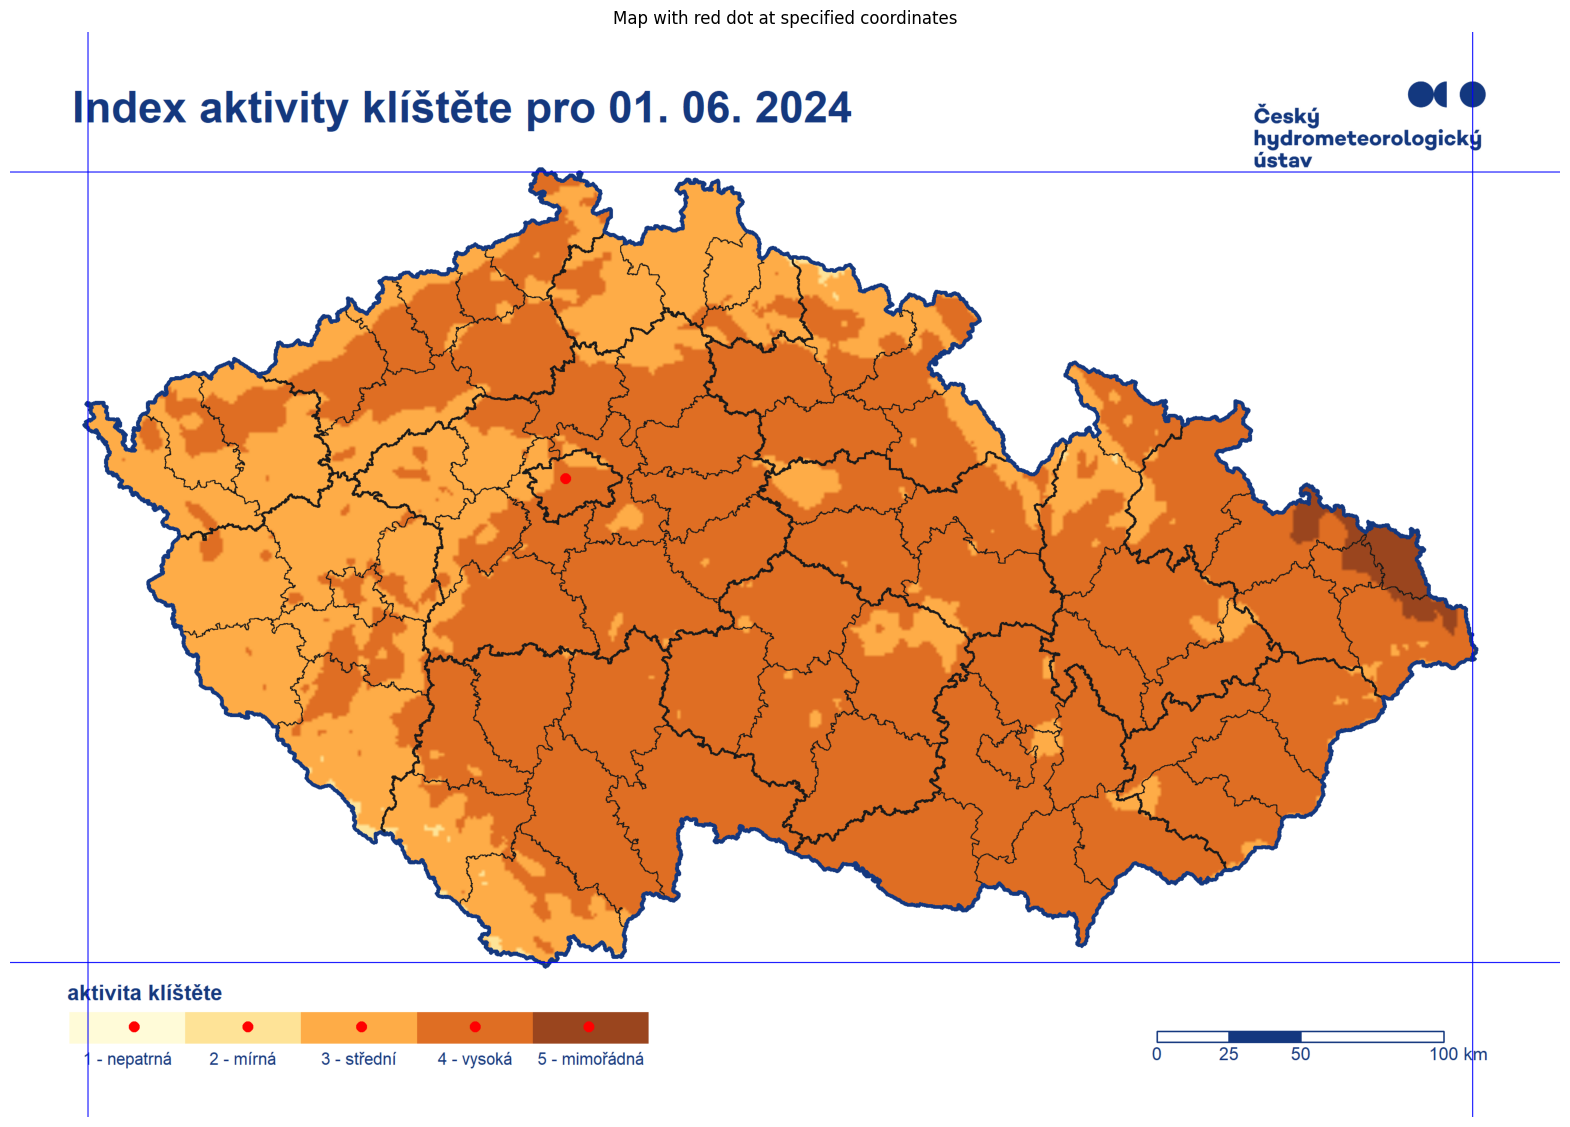

In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import requests
from io import BytesIO
from enum import Enum
import math

# URL of the map image
image_url = 'https://info.chmi.cz/bio/maps/kliste_1.png'

# Load the image from the URL
response = requests.get(image_url)
map_image = Image.open(BytesIO(response.content))

# Actual image size
image_width, image_height = map_image.size

# Approximate padding/border size in pixels
border_left = 150   # Adjust this value based on actual left border
border_right = 170  # Adjust this value based on actual right border
border_top = 270   # Adjust this value based on actual top border
border_bottom = 300 # Adjust this value based on actual bottom border

# Coordinates for the bounding box of the Czech Republic
lat_min, lat_max = 48.55, 51.05
lon_min, lon_max = 12.09, 18.87

# Function to convert geographic coordinates to pixel coordinates
def geo_to_pixel(lat, lon, image_width, image_height, border_left, border_right, border_top, border_bottom):
    x = border_left + (lon - lon_min) / (lon_max - lon_min) * (image_width - border_left - border_right)
    y = border_top + (1 - (lat - lat_min) / (lat_max - lat_min)) * (image_height - border_top - border_bottom)
    return int(x), int(y)

# Example coordinates (latitude and longitude) to plot
latitude = 50.07926370796739
longitude = 14.430981701794192



# Convert the coordinates to pixel positions
pixel_x, pixel_y = geo_to_pixel(latitude, longitude, image_width, image_height, border_left, border_right, border_top, border_bottom)


# Create a copy of the image to draw borders on
border_image = map_image.copy()
draw = ImageDraw.Draw(border_image)

# Draw border lines on the image
draw.line((border_left, 0, border_left, image_height), fill="blue", width=2)
draw.line((image_width - border_right, 0, image_width - border_right, image_height), fill="blue", width=2)
draw.line((0, border_top, image_width, border_top), fill="blue", width=2)
draw.line((0, image_height - border_bottom, image_width, image_height - border_bottom), fill="blue", width=2)

draw.ellipse((pixel_x-10, pixel_y-10, pixel_x+10, pixel_y+10), fill='red', outline='red')

def find_color(tuple):
    draw.ellipse((tuple[0]-10, tuple[1]-10, tuple[0]+10, tuple[1]+10), fill='red', outline='red')

color_extreme_coords = (1120, 1925)
find_color(color_extreme_coords)

color_high_coords = (900, 1925)
find_color(color_high_coords)

color_medium_coords = (680, 1925)
find_color(color_medium_coords)

color_low_coords = (460, 1925)
find_color(color_low_coords)

color_no_warning_coords = (240, 1925)
find_color(color_no_warning_coords)


# Plot the image with the red dot
plt.figure(figsize=(20, 20))
plt.imshow(border_image)
plt.title('Map with red dot at specified coordinates')
plt.axis('off')
plt.show()


In [2]:
def color_to_hex(rgb_color):
    hex_color = '#{:02x}{:02x}{:02x}'.format(*rgb_color)
    return hex_color

# Read the RGB color of the pixel at the specified coordinates
rgb_color = map_image.getpixel((pixel_x, pixel_y))
print(f"The RGB color at the specified coordinates is: {rgb_color}")
# Convert the RGB color to hex
print(f"The hex color at the specified coordinates is: {color_to_hex(rgb_color)}")

# I know this is shit but who cares
color_no_warning = map_image.getpixel(color_no_warning_coords)
color_low = map_image.getpixel(color_low_coords)
color_medium = map_image.getpixel(color_medium_coords)
color_high = map_image.getpixel(color_high_coords)
color_extreme = map_image.getpixel((color_extreme_coords[0], color_extreme_coords[1]))

print(f"The hex color 1 is: {color_to_hex(color_no_warning)}")
print(f"The hex color 2 is: {color_to_hex(color_low)}")
print(f"The hex color 3 is: {color_to_hex(color_medium)}")
print(f"The hex color 4 is: {color_to_hex(color_high)}")
print(f"The hex color 5 is: {color_to_hex(color_extreme)}")


class Severity(Enum):
    NO_WARNING = "#fffbd8"
    LOW = "#fee397"
    MODERATE = "#feac47"
    HIGH = "#df6e23"
    VERY_HIGH = "#9a451e"

# Function to convert hex color to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

# Function to get severity from hex color with tolerance
def get_severity_from_hex(hex_color, tolerance=20):
    def color_distance(c1, c2):
        return math.sqrt(sum((a - b) ** 2 for a, b in zip(c1, c2)))

    rgb_color = hex_to_rgb(hex_color)
    for severity in Severity:
        severity_rgb = hex_to_rgb(severity.value)
        if color_distance(rgb_color, severity_rgb) < tolerance:
            return severity
    return None

# Custom messages for each severity level
def get_severity_message(severity):
    match severity:
        case Severity.NO_WARNING:
            return "Nepatrná"
        case Severity.LOW:
            return "Mírná"
        case Severity.MODERATE:
            return "Střední"
        case Severity.HIGH:
            return "Vysoká"
        case Severity.VERY_HIGH:
            return "Mimořádná"
        case _:
            return "Neznámá"

# Get the custom message for the determined severity
severity = get_severity_from_hex(color_to_hex(rgb_color))
severity_message = get_severity_message(severity)
print(f"The hex color at the specified coordinates is: {severity.value}")
print(f"The severity at the specified coordinates is: {severity_message}")

The RGB color at the specified coordinates is: (223, 110, 35)
The hex color at the specified coordinates is: #df6e23
The hex color 1 is: #fffbd8
The hex color 2 is: #fee397
The hex color 3 is: #feac47
The hex color 4 is: #df6e23
The hex color 5 is: #9a451e
The hex color at the specified coordinates is: #df6e23
The severity at the specified coordinates is: Vysoká
